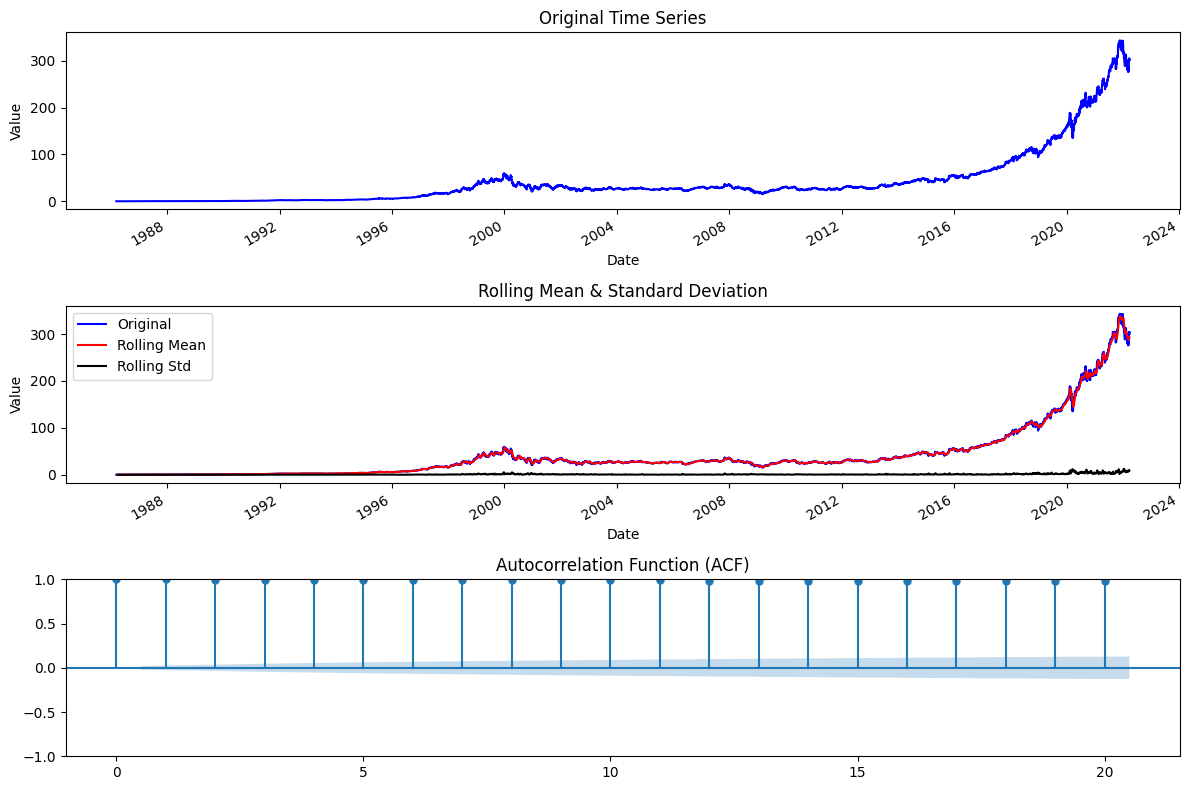

Stationarity: False
P-value: 1.0
Status: Time Series is Non-Stationary


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Install necessary libraries if not already installed
# Uncomment the line below if you don't have these libraries installed
# !pip install pandas numpy matplotlib statsmodels

def check_stationarity(timeseries):
    """
    Checks the stationarity of a time series using the Augmented Dickey-Fuller test.

    Args:
        timeseries: A pandas Series representing the time series data.

    Returns:
        A tuple containing:
            - The result of the ADF test (a boolean indicating stationarity).
            - The p-value of the ADF test.
            - A string describing the stationarity status.
            - A figure with plots of the original time series, rolling statistics, and ACF/PACF.
    """

    # Perform Augmented Dickey-Fuller test
    result = adfuller(timeseries)
    p_value = result[1]
    critical_values = result[4]

    # Determine stationarity based on p-value
    if p_value < 0.05:
        stationary = True
        status = "Time Series is Stationary"
    else:
        stationary = False
        status = "Time Series is Non-Stationary"

    # Data Visualization
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

    # Plot original time series
    timeseries.plot(ax=ax1, title="Original Time Series", color='blue')
    ax1.set_ylabel("Value")

    # Plot rolling statistics
    roll_mean = timeseries.rolling(window=12).mean()
    roll_std = timeseries.rolling(window=12).std()
    timeseries.plot(ax=ax2, label='Original', color='blue')
    roll_mean.plot(ax=ax2, label='Rolling Mean', color='red')
    roll_std.plot(ax=ax2, label='Rolling Std', color='black')
    ax2.set_ylabel("Value")
    ax2.legend(loc='best')
    ax2.set_title("Rolling Mean & Standard Deviation")

    # Autocorrelation and Partial Autocorrelation plots (optional but informative)
    try:
        from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
        plot_acf(timeseries, ax=ax3, lags=20)  # Adjust lags as needed
        ax3.set_title("Autocorrelation Function (ACF)")
        plt.tight_layout()
        plt.show()
    except ImportError as e:
        print(f"Warning: statsmodels not installed. ACF/PACF plots not generated. Install with: pip install statsmodels")

    return stationary, p_value, status, fig


# Example usage:
# Load data (replace with your actual data loading code)
data = pd.read_csv('/content/MSFT.csv', parse_dates=['Date'], index_col='Date')

# Ensure the 'Close' column is used for time series analysis
timeseries = data['Close']  # Use 'Close' price for analysis

# Check for stationarity and get the plots
is_stationary, p_value, status, fig = check_stationarity(timeseries)

print(f"Stationarity: {is_stationary}")
print(f"P-value: {p_value}")
print(f"Status: {status}")
plt.show()  # Show the plot again
